## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#reading the dataset in a dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#check the first timestamp (begining of the experiment)
df.sort_values(by=['timestamp']).head(1)

,user_id,timestamp,group,landing_page,converted
131228,922696,2017-01-02 13:42:05.378582,treatment,new_page,0


In [4]:
#check the last timestamp (end of the experiment)
df.sort_values(by=['timestamp']).tail(1)

,user_id,timestamp,group,landing_page,converted
193652,920411,2017-01-24 13:41:54.460509,control,old_page,0


b. Use the cell below to find the number of rows in the dataset.

In [5]:
#number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
#number of unique user ids
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
#finding the number of treatment group users who recieved the old_page
#and the number of control group users who recieved the new_page
len(df[(df['group'] != 'treatment')  & (df['landing_page'] == 'new_page')]) + len(df[(df['group'] == 'treatment')  & (df['landing_page'] != 'new_page')])

3893

f. Do any of the rows have missing values?

In [9]:
#check if there are NaN values in the dataset
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#delete all the rows where treatment does not match with new_page
#or control does not match with old_page
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [11]:
#Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#number of unique user ids
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#finding the repeated user id
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
#the repeated user id row
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#removing one of the duplicated rows
df2.drop_duplicates(subset=['user_id'], inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
#probability of converting
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
#probability of converting in the control group
df2[(df2['group'] == 'control')]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
#probability of converting in the treatment group
df2[(df2['group'] == 'treatment')]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
#probability of receiving the new page
len(df2[df2['landing_page'] == 'new_page']) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**the probability of receving the new page is approximately 0.5 which means that the probability of receiving the old page is also approximately 0.5, however the probability that an individual from the treatment group converted is very close to the probability that an individual from the control group converted, in fact former is even a bit lower; so I don't think there is sufficient evidence to conclude that new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{o} : p_{new} - p_{old} <= 0$**

**$H_{A} : p_{new} - p_{old} > 0$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#assume the converted rate of the new page is equal to  the converted success rate regardless of page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
#assume the converted rate of the old page is equal to  the converted success rate regardless of page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
#number of users in the treatment group (users who received the new page)
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
#number of users in the control group (users who received the old page)
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

-0.00054567836414762261

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

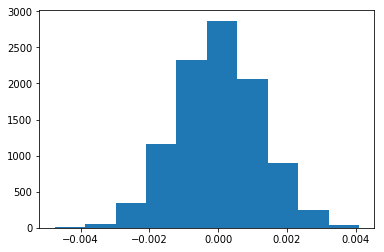

In [28]:
#p_diffs histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
#calculating the observed difference in ab_data.csv (p_new - p_old)
ab_data_diff = df2[(df2['group'] == 'treatment')]['converted'].mean() - df2[(df2['group'] == 'control')]['converted'].mean()
ab_data_diff

-0.0015782389853555567

In [30]:
#calculating the p-value
#proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(p_diffs > ab_data_diff).mean()

0.9052

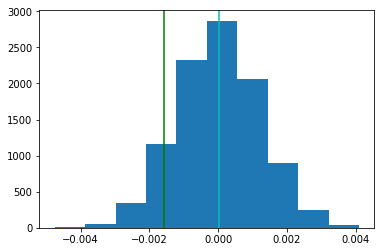

In [31]:
#p_diffs histogram with a line to mark the p_diffs mean and the observed difference
plt.hist(p_diffs);
plt.axvline(x=ab_data_diff, color='g')
plt.axvline(x=np.mean(p_diffs), color='c')

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**- What was copmputed in part j is the p-value.**

**- The p-value is the probability of obtaining the observed statistic or a "more extreme" value (by extreme we just mean more in favour of the alternate hypothesis mean) if the null hypothesis is true. At low p-values (lower than Type I error rate) we typically reject the null hypothesis and at p-values higher than the Type I error rate we fail to reject the null hypothesis.**

**- In our case the p-value is very high (0.906) which means that we fail to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

#number of control group (old page) users who converted
convert_old = df2[df2['group'] == 'control']['converted'].sum()
#number of treatment group (new page) users who converted
convert_new = df2[df2['group'] == 'treatment']['converted'].sum()
#number of control group (old page) users
n_old = len(df2[df2['group'] == 'control'])
#number of treatment group (new page) users
n_new = len(df2[df2['group'] == 'treatment'])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
#calculating the z-score and p-value using built in functions
#alternative parameter is set to smaller like our alternative hypothesis (P_old < p_new)
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
stat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**- z-score is a measure of how many standard deviations below or above the population mean a raw score is. in this case the z-score is (1.31) which means that we are 1.31 standard deviations above the mean.**

**- Our z-score is in the 95% confidence interval and because we have Type I error rate of %5 this means that we fail to reject the null hypothesis**

**- our p-value (can be calculated from the z-score) is 0.905 which is high (higher than the Type I error rate 0.05) meaning that we fail to reject the null**

**- yes this agrees with the findings in parts j. and k., this p-value is very close to the p-value calculated earlier and in both cases we fail to reject the null**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**- we have one independent variable (landing_page) which is used to predict the dependent variable (converted)**

**- the dependent variable is binary (0: not-converted, 1: converted)**

**- The type of regression that should be used is logistic regression**

**- Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. When the dependent variable has two categories, then it is a binary logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
#adding intercept
df2['intercept'] = 1
#adding a dummy variable column for pages (0: received old page, 1: received new page)
df2['ab_page'] = pd.get_dummies(df2['group']).loc[0:, 'treatment']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
import statsmodels.api as sm
#create a logistic regression model
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
#fitting the model
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
#print model summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:44 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**- The p-value associated with ab_page is 0.1899.**

**- This p- value differs from the one calculated in part II because the hypothesis test for each x-variable is a test of if that population slope is equal to zero vs. an alternative where the parameter differs from zero. Therefore, if the slope is different than zero (the alternative is true), we have evidence that the x-variable attached to that coefficient has a statistically significant linear relationship with the response. This in turn suggests that the x-variable should help us in predicting the response (or at least be better than not having it in the model).**

**- In our case the p-value associated with the ab_page is higher than the type i error rate (0.05) so we fail to reject the null (slope is equal to zero) which means that there no linear relationship between it and the converion (the ab_page is not statistically significant)**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**- In our model we found that the independent variable ab_page doesn't explain the dependent variable converted.**

**- Finding another variable that is relevant (has a linear relationship with the dependent variable) would improve our model.**

**- Adding a relevant variable can prevent bias in the estimate of the other regression coefficient but can also increase variance of other regression coefficient.**

**- Adding an irrelevant variable can increase the variance of the estimate of other correlation coefficient and will not have any benefits.**

**- In summary, adding a variable (considering it's not orthogonal to the previous ones) to a linear regression model will cause a bias reduction in the coefficients estimates but an increase in their variances. Since you never know what are the real relevant variables, you need to balance this bias-variance trade-off.**

**- Some of the problems that could happen:**

    - Linearity: no linear relationship between the new variable and the response.**
    - Multi-collinearity: a linear relationship between the x variables.**
    - It could have outliers to that affect our results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#reading the countries data and printing the first five rows
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
#number of rows in countries dataframe
countries.shape[0]

290584

In [39]:
#number of unique user ids in countries dataframe
countries.nunique()

user_id    290584
country         3
dtype: int64

In [40]:
#check if there are a NaN values
countries.isna().sum()

user_id    0
country    0
dtype: int64

In [41]:
#join the countries column to df2, the parameter on is set 'user_id' so countries is attached to the write users
df2 = df2.join(countries.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
#creating dummy variables for the countries
df2 = df2.join(pd.get_dummies(df2['country']))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [43]:
#create a logistic regression model
model2 = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
#fitting the model
results2 = model2.fit()
#printing the model summary
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:44 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

**The p-values are larger than 0.05 (type I error rate) which means that the countries are not statistically significant**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
#create a logistic regression model
model3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK']])
#fitting the model
results3 = model3.fit()
#printing the model summary
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-15 20:44 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

**- The p-values are larger than 0.05 (type I error rate) which means that the page type and the countries are not statistically significant.**

**- My conclusion: Our results suggest that the company should not implement the new page. but if we check the timestamps we find that the  experiment was running for less than a month so i think the company should run the experiment a little longer before make their decision.**

sources:
https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

https://rebeccaebarnes.github.io/2018/05/01/what-is-a-p-value

https://www.statisticshowto.com/probability-and-statistics/z-score/

https://en.wikipedia.org/wiki/Logistic_regression

https://www.statisticssolutions.com/regression-analysis-logistic-regression/

https://stats.stackexchange.com/questions/304707/costs-and-benefits-of-adding-more-variables-to-multiple-regression

https://en.wikipedia.org/wiki/Omitted-variable_bias

https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html

https://youtu.be/L8QR7wxmmQg

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html

from the classroom:

- regression: 16
- multiple linear regression: 16


In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0